# Logistic Regression Algorithm - using scikit-learn

#### Implement Multiclass Logistic Regression with multiple variables

#### Dataset - IRIS.csv

In [15]:
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### STEP1 : Data Acquisition 
* Loading the Data set using pandas module 
* Defining dependent & Indepdendent

In [45]:
# using IRIS dataset - Importing Data

iris_data=pd.read_csv('C:\\Users\\rames\\OneDrive\\Desktop\\python\\IRIS_data.csv')
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
# displaying number of iris in the data set

print("# of species in original data:" + str(len(iris_data.index)))

# of species in original data:150


<AxesSubplot:xlabel='species', ylabel='count'>

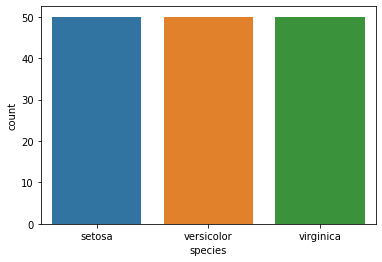

In [20]:
#Analyzing Data - how one variable is affecting other - go for correlation or scatter plot
# Plotting count of species 

sns.countplot(x="species", data = iris_data)



<AxesSubplot:xlabel='species', ylabel='count'>

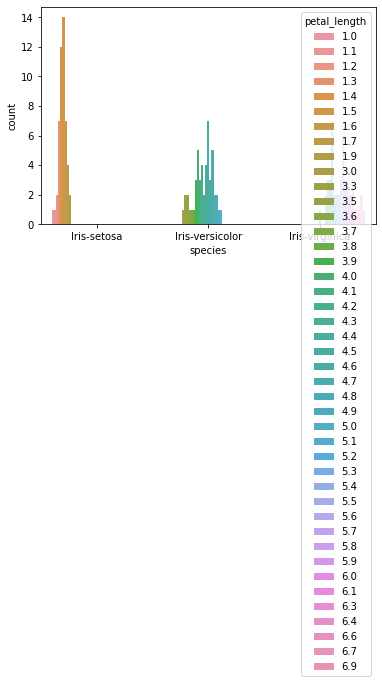

In [46]:
# Adding petal (length and width) for the species 

sns.countplot(x="species", hue="petal_length", data = iris_data)

<AxesSubplot:xlabel='species', ylabel='count'>

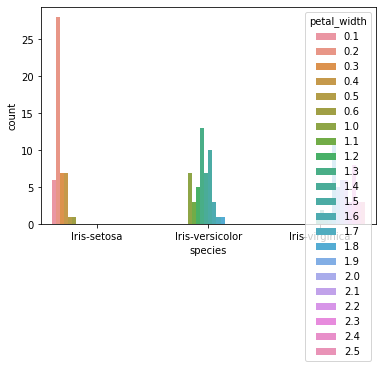

In [11]:
sns.countplot(x="species", hue="petal_width", data = iris_data)

<AxesSubplot:xlabel='species', ylabel='count'>

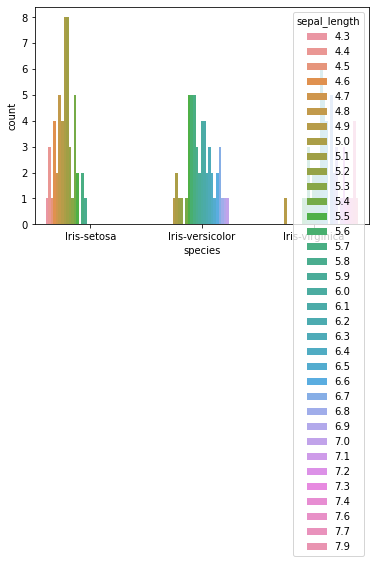

In [12]:
sns.countplot(x="species", hue="sepal_length", data = iris_data)

<AxesSubplot:xlabel='species', ylabel='count'>

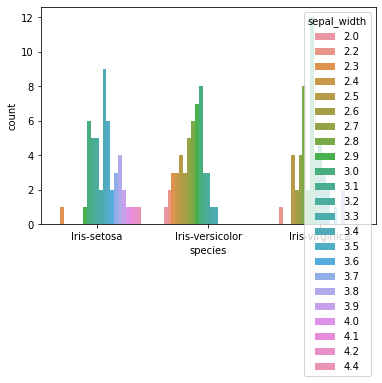

In [13]:
sns.countplot(x="species", hue="sepal_width", data = iris_data)

<AxesSubplot:ylabel='Frequency'>

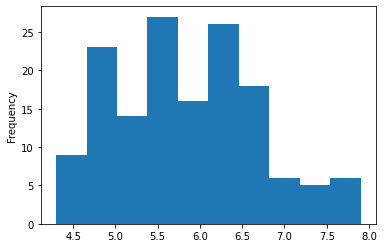

In [17]:
# plotting histogram for the species
iris_data["sepal_length"].plot.hist()

### STEP2 : Data Preparation 
* Munging / Imputation (fill-in)
* Structure
* NaN Handling
* EDA,...

In [18]:
# identifying the null values
iris_data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [20]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

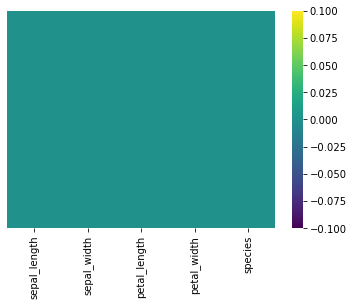

In [47]:
# using the heatmap to analyse the null values
sns.heatmap(iris_data.isnull(),yticklabels = False, cmap = "viridis")

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

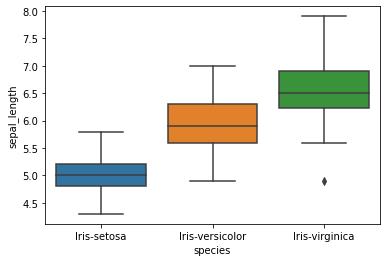

In [25]:
# analysing the species vs sepal_length
sns.boxplot(x = "species", y = "sepal_length", data=iris_data)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

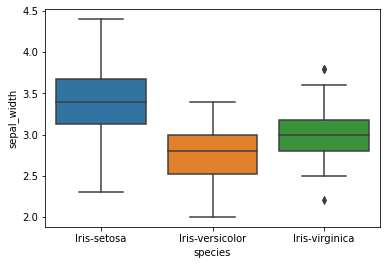

In [27]:
sns.boxplot(x = "species", y = "sepal_width", data=iris_data)

In [50]:
# converting the string values into categorical values
# Logistic regression would not accept strings - Hence using dummy variable method in Pandas
pd.get_dummies(iris_data['species'])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [49]:
# Applying the (n-1) method - where you do not need both the dummy variable columns (female and male)
# then assigning the resultant values to the variable 'sex'

spec = pd.get_dummies(iris_data['species'], drop_first = True)
spec.head()

,Iris-versicolor,Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [48]:
## We have categorical values for all  variables 
## concatenate all these columns (dummies) into the dataframe
Spec_data = pd.concat([iris_data, spec], axis=1)
Spec_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [51]:
Spec_data.drop(["species"], axis=1, inplace=True)
Spec_data.head()

,sepal_length,sepal_width,petal_length,petal_width,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


### STEP3: Model Building
* Data Splitting
* Algo Preparation
* Training

In [53]:
X=iris_data.drop("species", axis=1)
y=iris_data["species"]

In [54]:
# Splitting the data - 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# random_state takes the sample for every tun

In [55]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\rames\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### STEP4: Model Evaluation
* Testing
* Prediction
* Visualization

In [56]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



##### *** Precision values of  1.00 0.93 0.98 are good


In [57]:
# To calcualte the accuracy use the confusion matrix
confusion_matrix(y_test, predictions)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

#### ** Confusion matrix is a 3x3 matrix which has 9outcomes
* Predicted No, Predicted Yes on x-axis and Actual No and Actual Yes on y-axis
* From above, 169 times model predicted No and it is actually No and 97 times model predicted Yes and it is actually Yes
* Accuracy could be calculated by adding both these values (total correct / Total number of items)


In [58]:
accuracy_score(y_test, predictions)

0.9777777777777777

#### ** 97% accuracy is very good